In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
def weight_variable (shape):
    init=tf.random_normal(shape,stddev=0.01)
    return tf.Variable(init)

def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

def max_pool22(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [47]:
x=tf.placeholder(tf.float32, [None,784])
y_=tf.placeholder(tf.float32,[None,10])

x_image=tf.reshape(x,[-1,28,28,1])

w_conv=weight_variable([5,5,1,10])
b_conv=weight_variable([10])

w_fc1=weight_variable([14*14*10,400])
b_fc1=weight_variable([400])

w_fc2=weight_variable([400,10])
b_fc2=weight_variable([10])

h_conv=tf.nn.relu(conv2d(x_image,w_conv)+b_conv)
h_pool=max_pool22(h_conv)
h_pool_flat=tf.reshape(h_pool,[-1,14*14*10])

h_fc1=tf.nn.relu(tf.matmul(h_pool_flat,w_fc1)+b_fc1)
y=tf.nn.softmax(tf.matmul(h_fc1,w_fc2)+b_fc2)

mse=tf.reduce_mean(tf.square(y-y_))
train_step=tf.train.AdamOptimizer(0.01).minimize(mse)
#train_step=tf.train.GradientDescentOptimizer(0.08).minimize(mse)

In [48]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(350):
    batchX,batchY=mnist.train.next_batch(100)
    sess.run(train_step,feed_dict={x:batchX, y_:batchY})

    if i%50==0:
        print('Iteration: '+str(i)+'train MSE: ' +str(sess.run(mse,feed_dict={x:batchX,y_:batchY})))

print("Optimization Finished!")

Iteration: 0train MSE: 0.08852965
Iteration: 50train MSE: 0.013230528
Iteration: 100train MSE: 0.0033250672
Iteration: 150train MSE: 0.0061588446
Iteration: 200train MSE: 0.009826978
Iteration: 250train MSE: 0.004267861
Iteration: 300train MSE: 0.0068453914
Optimization Finished!


In [49]:
preds=sess.run(y,feed_dict={x:mnist.test.images,y_:mnist.test.labels})
print(preds)
preds=np.argmax(preds,axis=1)
truelabels=np.argmax(mnist.test.labels,axis=1)
errors=0.
ci=0

[[1.33623772e-11 1.95062456e-12 2.82886266e-08 ... 1.00000000e+00
  1.42524204e-11 1.45249830e-08]
 [1.34942493e-08 1.50508439e-09 1.00000000e+00 ... 4.76669220e-16
  7.46448389e-12 8.50138005e-22]
 [1.17169591e-04 9.95865107e-01 1.83852844e-05 ... 2.04330820e-04
  4.45928337e-04 2.44479219e-04]
 ...
 [6.72445294e-11 2.57307224e-08 2.73115020e-11 ... 7.71716373e-07
  6.14611736e-06 1.12999944e-04]
 [7.82489143e-11 4.14391924e-11 3.49630815e-17 ... 7.38409889e-10
  1.98981866e-07 3.64231028e-06]
 [4.63642147e-09 1.05522702e-10 1.04491062e-06 ... 5.02729965e-13
  2.81788800e-07 6.18804975e-13]]


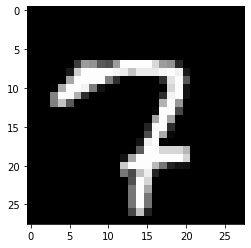

Pred: 2 TrueLabel: 7


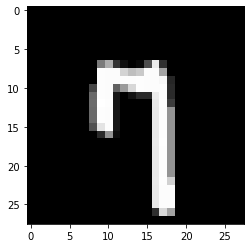

Pred: 9 TrueLabel: 7


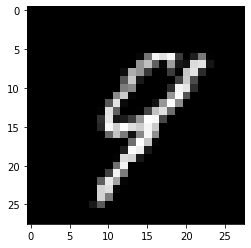

Pred: 4 TrueLabel: 9


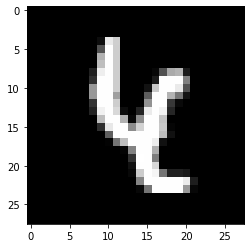

Pred: 8 TrueLabel: 4


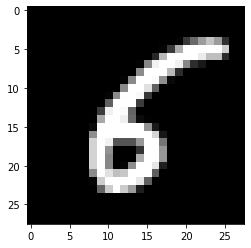

Pred: 5 TrueLabel: 6
Test error: 0.0356


In [50]:
for i in range (preds.shape[0]):
    if preds[i]!=truelabels[i]:
        if ci<5:
            plt.imshow(mnist.test.images[i].reshape(28,28),cmap='gray')
            plt.show()
            ci=ci+1
            print('Pred: '+str(preds[i])+' TrueLabel: '+ str(truelabels[i]))
        errors=errors+1
print('Test error: '+str(errors/preds.shape[0]))

(5, 5, 1, 10)


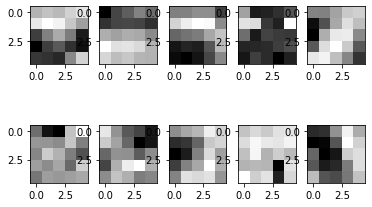

In [51]:
kernel=sess.run(w_conv)
print(kernel.shape)
f,axes=plt.subplots(2,5)
for i in range(10):
    axes.ravel()[i].imshow(kernel[:,:,0,i],cmap='gray',interpolation='none')
    acts=sess.run(h_conv,feed_dict={x:mnist.test.images[0:100]})

(100, 28, 28, 10)


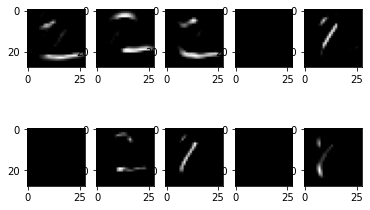

In [58]:
print(acts.shape)
f,axes=plt.subplots(2,5)
index=1
for i in range(10):
    axes.ravel()[i].imshow(acts[index,:,:,i],cmap='gray')

    
plt.show()
